In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

sns.set_style('whitegrid')

In [70]:
d=pd.read_csv("C:/Users/andti/GitHub/Financial/Marketing and Sales/Advertising Budget and Sales.csv")

In [8]:
d

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Display distribution of department and Sales

<AxesSubplot:xlabel='TV Ad Budget ($)', ylabel='Count'>

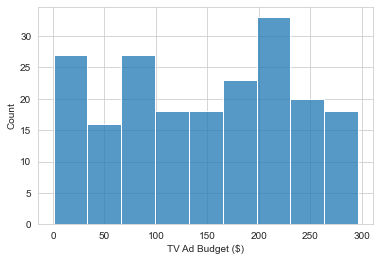

In [9]:
sns.histplot(d['TV Ad Budget ($)'])

<AxesSubplot:xlabel='Radio Ad Budget ($)', ylabel='Count'>

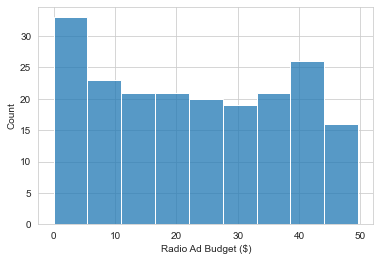

In [10]:
sns.histplot(d['Radio Ad Budget ($)'])

<AxesSubplot:xlabel='Newspaper Ad Budget ($)', ylabel='Count'>

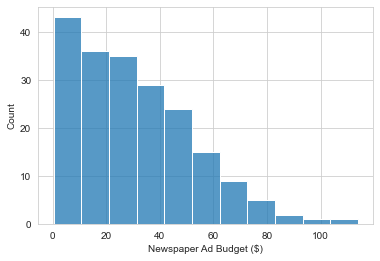

In [11]:
sns.histplot(d['Newspaper Ad Budget ($)'])

In [73]:
def getBucket(forColumn, defineBucketSize, nameColumn):
    d[nameColumn] = d.loc[:, forColumn] / defineBucketSize+1
    d[nameColumn] = np.floor(d[nameColumn]).astype('int')
    #order data
    d.sort_values([nameColumn], inplace=True)
    d[nameColumn]=((d[nameColumn]-1)*defineBucketSize).astype(str)+"-"+(d[nameColumn]*defineBucketSize).astype(str)
    d.reset_index(drop=True, inplace=True)
    return d

In [74]:
getBucket(forColumn= 'TV Ad Budget ($)', defineBucketSize= 50, nameColumn='TVBudgetBucket')

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($),TVBudgetBucket
0,5.4,29.9,9.4,5.3,0-50
1,13.2,15.9,49.6,5.6,0-50
2,17.2,4.1,31.6,5.9,0-50
3,28.6,1.5,33.0,7.3,0-50
4,31.5,24.6,2.2,9.5,0-50
...,...,...,...,...,...
195,255.4,26.9,5.5,19.8,250-300
196,262.7,28.8,15.9,20.2,250-300
197,276.9,48.9,41.8,27.0,250-300
198,296.4,36.3,100.9,23.8,250-300


<AxesSubplot:xlabel='TVBudgetBucket', ylabel='Count'>

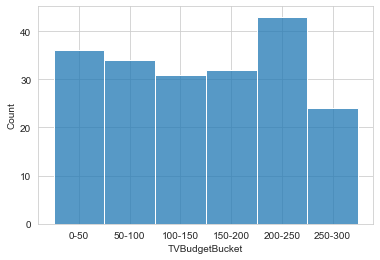

In [75]:
sns.histplot(d['TVBudgetBucket'])

Generate model for estimating TV Budget and confidence in receiving budget amount 250 or more

In [76]:
p = [.18, .17, .15, .15, .25, .10]

In [87]:
budgetTarget = [50, 100, 150, 200, 250, 300]
samples = 500
simulations = 1000

In [85]:
budgetCollection = np.random.choice(budgetTarget, samples, p)

In [91]:
sum(budgetCollection > 250) / len(budgetCollection)

0.196

In [92]:
#what is the likelihood of obtaining 250 or more of the budget
collectStats = []
for i in range(simulations):
    budgetCollection = np.random.choice(budgetTarget, samples, p)
    collectStats.append(sum(budgetCollection > 250) / len(budgetCollection))

<AxesSubplot:ylabel='Probability'>

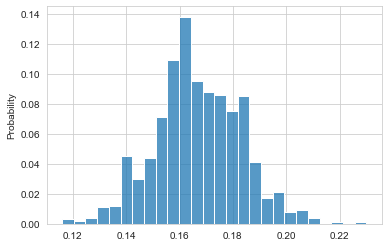

In [94]:
sns.histplot(collectStats, stat='probability')

In [105]:
pGreaterThan250 = pd.DataFrame(collectStats, columns=['Likelihood'])

In [106]:
pGreaterThan250.describe()

,Likelihood
count,1000.00000
mean,0.16670
std,0.01615
min,0.11600
25%,0.15600
50%,0.16600
75%,0.17800
max,0.23000
